# Task 6.5

## 1. Import libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
df_all = pd.read_pickle(r'/Users/marianino/Desktop/Happiness Data/Data/Cleaned Data/df_all.pkl')

In [4]:
# Check data
df_all.head()

,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
Country,,,,,,,,,,
Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [5]:
df_all.shape 

(781, 10)

In [6]:
# Drop unnecessary columns and categorical columns 
Dropcolumns = ['Region', 'Happiness Rank', 'Year']
df_sub = df_all.drop(columns=Dropcolumns)

In [7]:
# Check sub set
df_sub.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Country,,,,,,,
Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [8]:
df_sub.isnull().sum()

Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
dtype: int64

In [9]:
df_sub['Trust (Government Corruption)'].mean()

0.1253823258986815

In [10]:
# Fix null value with the mean 
df_sub2 = df_sub.fillna(value = 0.12538)

In [11]:
df_sub2.isnull().sum()

Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

## 2. Find the Elbow 

In [12]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)

In [13]:
# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [14]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_sub2).score(df_sub2) for i in range(len(kmeans))] 

/Users/marianino/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/marianino/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/marianino/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/marianino/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

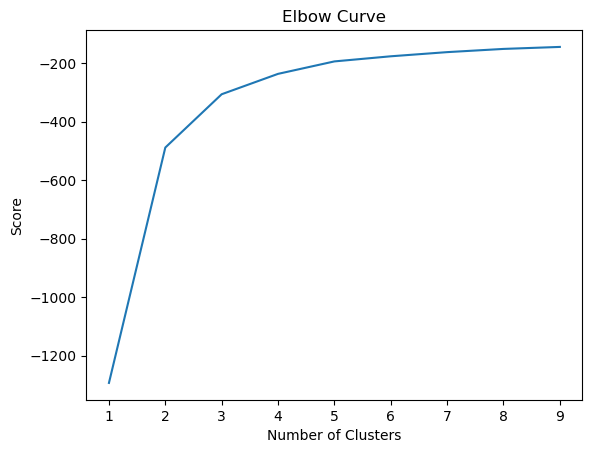

In [15]:
# Plot the elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In this example, the curve begins to flatten after 3. This means that the optimal number of clusters is 3

## 3. K-means clustering 

In [16]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3)

In [17]:
# Fit the k-means object to the data. 
kmeans.fit(df_sub2)

/Users/marianino/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [18]:
# Perform clustering using the k-means model and assign the results to new 'clusters' column
df_sub2['clusters'] = kmeans.fit_predict(df_sub2)

/Users/marianino/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
df_sub2.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,clusters
Country,,,,,,,,
Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,0
Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,0
Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,0
Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,0
Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,0


In [20]:
# Check the frequency of each unique value in the 'clusters' column
df_sub2['clusters'].value_counts()

clusters
1    308
2    277
0    196
Name: count, dtype: int64

### Visualizations 

/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


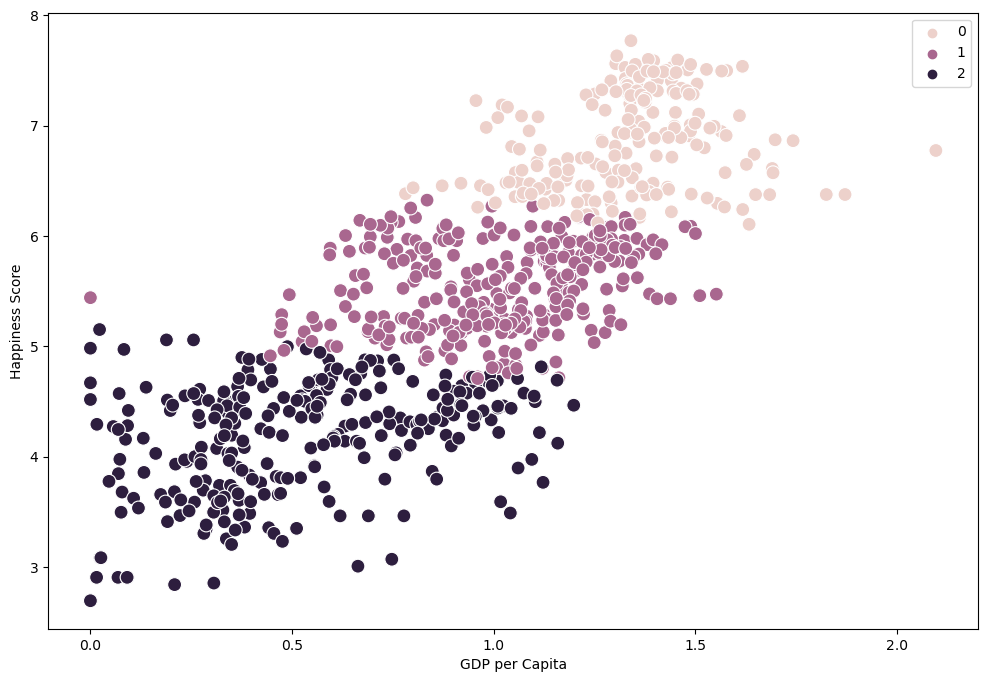

In [21]:
# Plot the clusters for the "Happiness Score" and "Economy(GDP per Capita)" variables.

plt.figure(figsize=(12,))
ax = sns.scatterplot(x=df_sub2['Economy (GDP per Capita)'], y=df_sub2['Happiness Score'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


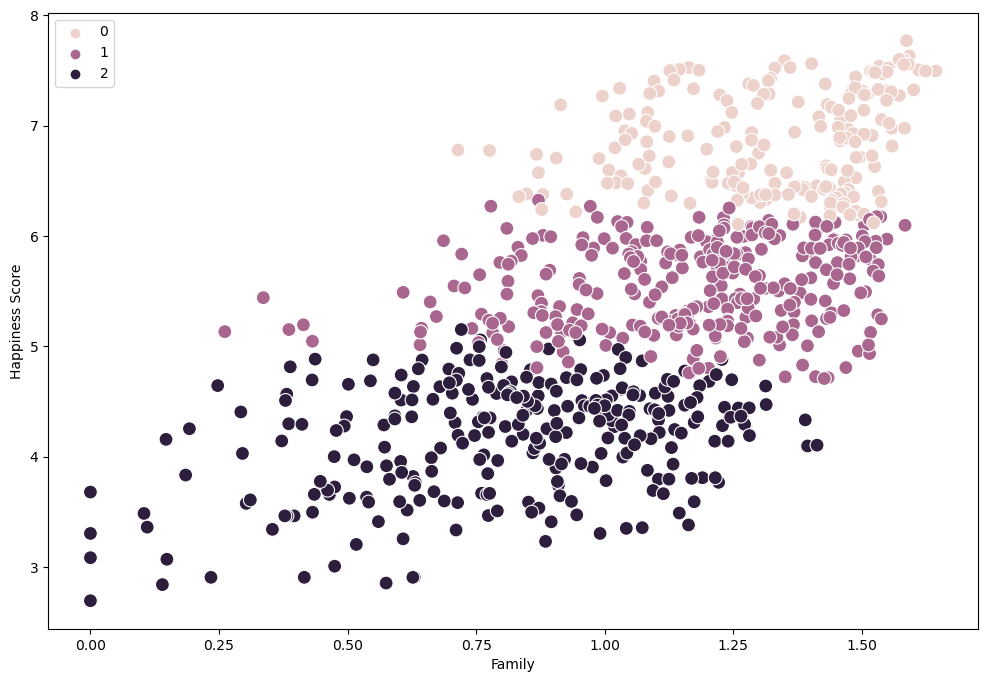

In [22]:
# Plot the clusters for the "Happiness Score" and "Family" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub2['Family'], y=df_sub2['Happiness Score'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Family')
plt.ylabel('Happiness Score')
plt.show()

/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


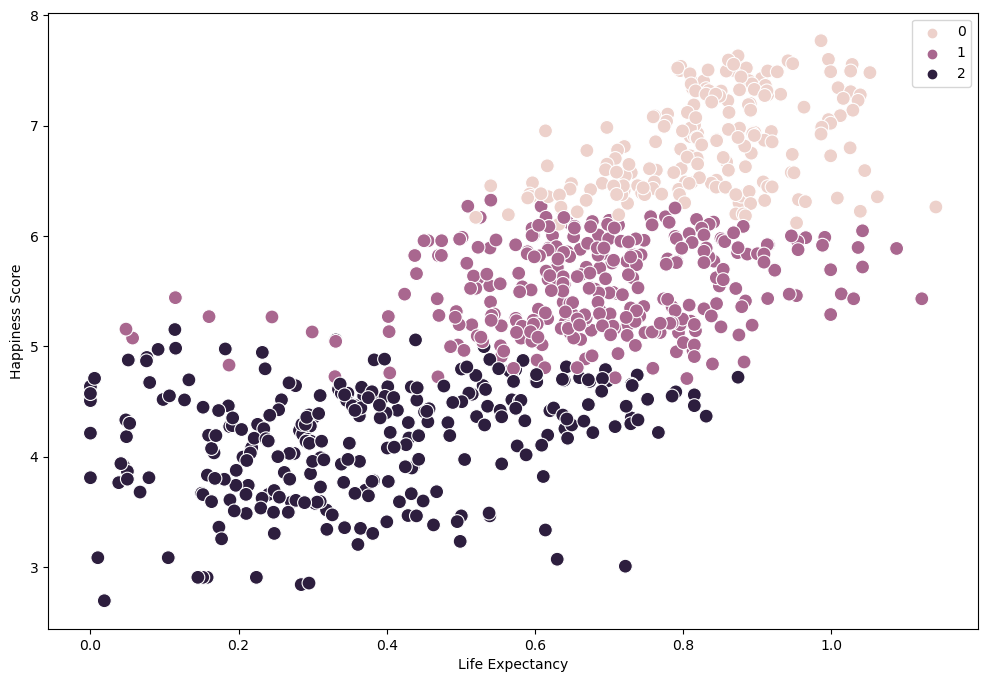

In [25]:
# Plot the clusters for the "Happiness Score" and "Freedom" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub2['Health (Life Expectancy)'], y=df_sub2['Happiness Score'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Life Expectancy')
plt.ylabel('Happiness Score')
plt.show()

/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


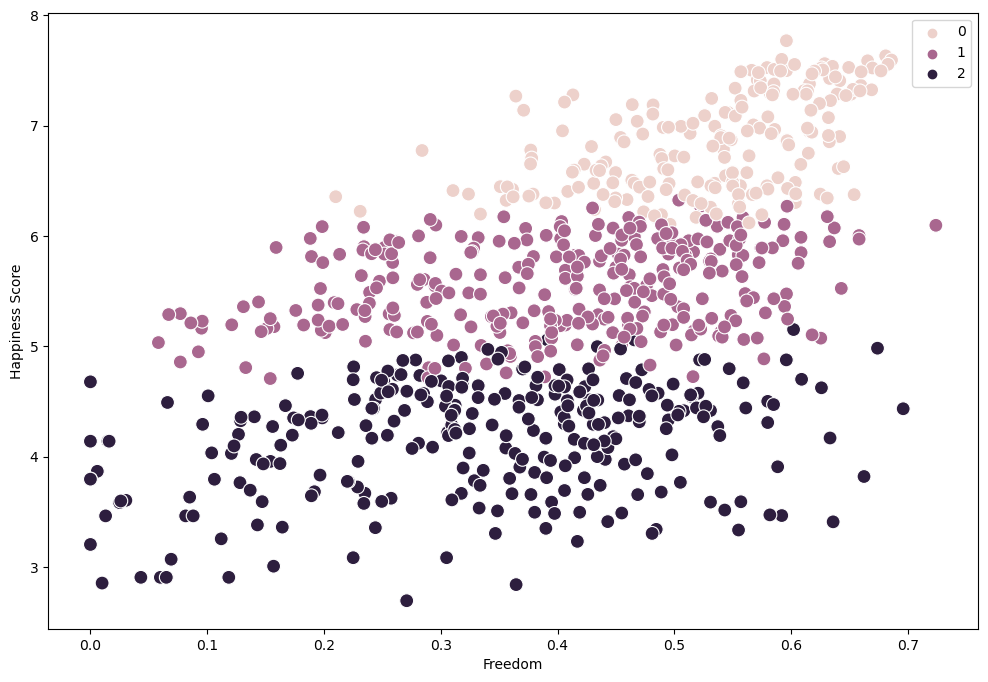

In [24]:
# Plot the clusters for the "Happiness Score" and "Freedom" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub2['Freedom'], y=df_sub2['Happiness Score'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')
plt.show()

/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


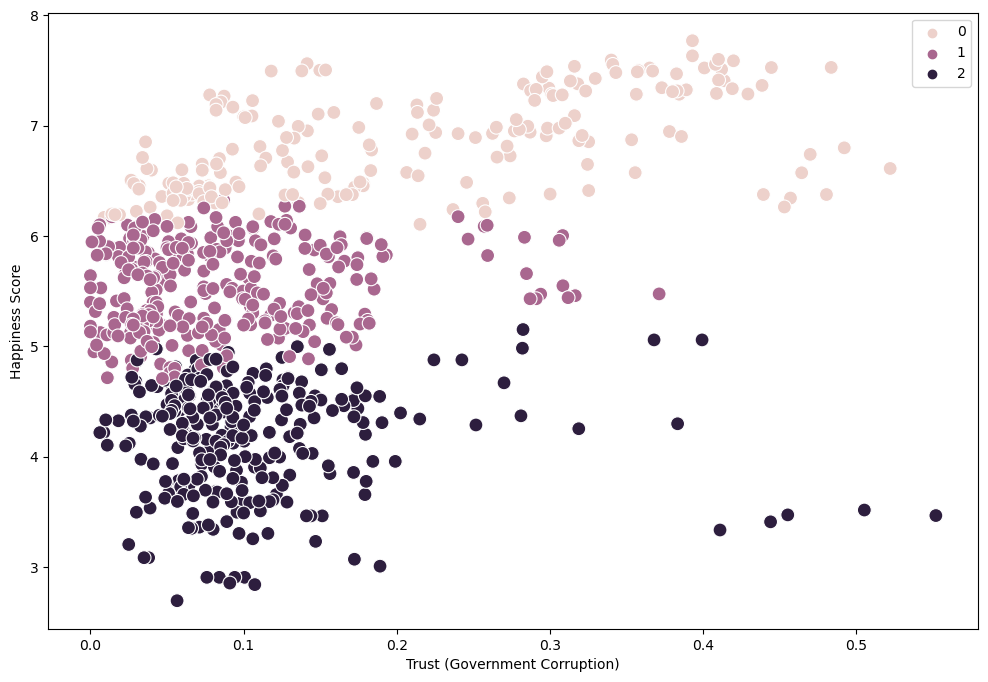

In [26]:
# Plot the clusters for the "Happiness Score" and "Trust (Government Corruption)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub2['Trust (Government Corruption)'], y=df_sub2['Happiness Score'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Happiness Score')
plt.show()

### Conclusions

For the first three variables: Economy (GDP per Capita), Family and Health (Life Expectancy), there is a positive slope between them and the happiness score. This indicates that there is a positive relationship, which has been proven in previous exercises as well. 

I also wanted to check 2 variables that I haven't used before, the Freedom and Trust (Government Corruption). For these cases, there isn't a strong connection as the other 3. 

## 4. Descriptive Statistics

In [28]:
# Rename clusteres
df_sub2.loc[df_sub2['clusters'] == 2, 'cluster'] = 'dark purple'
df_sub2.loc[df_sub2['clusters'] == 1, 'cluster'] = 'purple'
df_sub2.loc[df_sub2['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/zq/gd226qtd2tq509tvr0_wm2kc0000gn/T/ipykernel_43887/1578056404.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark purple' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_sub2.loc[df_sub2['clusters'] == 2, 'cluster'] = 'dark purple'


In [29]:
df_sub2.groupby('cluster').agg({'Economy (GDP per Capita)':['mean', 'median'],
                         'Family':['mean', 'median'],
                         'Health (Life Expectancy)':['mean', 'median'],
                         'Trust (Government Corruption)':['mean', 'median'],
                         'Freedom':['mean', 'median'],
                         'Generosity':['mean', 'median'],
                         'Happiness Score':['mean', 'median']})

Economy (GDP per Capita)             Family            \
                                mean   median      mean    median   
cluster                                                             
dark purple                 0.519469  0.47200  0.811944  0.847830   
pink                        1.334246  1.34314  1.320958  1.368500   
purple                      1.008559  1.02482  1.164116  1.208447   

            Health (Life Expectancy)           Trust (Government Corruption)  \
                                mean    median                          mean   
cluster                                                                        
dark purple                 0.376500  0.358740                      0.106391   
pink                        0.833598  0.838177                      0.214066   
purple                      0.684433  0.684500                      0.086027   

                        Freedom           Generosity          Happiness Score  \
               median      mean    median       mean   median            mean   
cluster                                                                         
dark purple  0.088000  0.336080  0.352000   0.222871  0.20363        4.167032   
pink         0.185155  0.532029  0.550068   0.267693  0.26100        6.849066   
purple       0.071490  0.401686  0.418136   0.183293  0.17204        5.536334   

                     
             median  
cluster              
dark purple  4.2860  
pink         6.8385  
purple       5.5250

### Insights

Based on the descriptives analytics I could say:

-The "dark purple" cluster generally has lower scores across all metrics compared to the other clusters.

-The "pink" cluster tends to have the highest scores across most metrics, particularly in terms of GDP per Capita, Family, and Happiness Score.

-The "purple" cluster falls between the other two clusters in terms of most metrics, with moderate scores across the board.

### Further Uses

The descriptive analytics offer a useful framework for several applications in an analytics pipeline. They can guide segmentation analysis to identify distinct socio-economic clusters, aid in predictive modeling by serving as features for forecasting trends, and inform policy planning by highlighting areas for improvement. Additionally, these insights can facilitate benchmarking and goal setting, allowing countries to set realistic development targets, and guide intervention design to address specific socio-economic challenges within each cluster.